In [8]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import openpyxl
import scipy.optimize

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

# Carga-masa nuevo

In [9]:
def Minimos_cuadrados(x,y,n=1):
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

def GetError(x,y,p,n=1):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    R2 = None
    if np.shape(Cov) == (2,2):
        R2 = (Cov[0][1]**2)/(Cov[0][0]*Cov[1][1])

    return (Cov,R2,R)

def Get_sigma(Cov):
    sigmaai = np.sqrt(np.diagonal(Cov))
    return sigmaai[::-1]

def Error_relativo(X_real,X_exp):
    return (np.abs(X_exp - X_real)/X_real)

def presicion(d,v):
    p = (d/v)
    if p <= 0.1:
        return p,True
    else:
        return p,False
    
def exactitud(xr,xm,d):
    e = (np.abs(xr-xm))
    if e <= (2.5*d):
        return e/d,True
    else:
        return e/d,False

X = sym.Symbol('x',real=True)
Y = sym.Symbol('y',real=True)

In [10]:
c = 299798458*1e09 #nm/s
c_ = 299798458 #m/s
me = 0.51099895*1e06/(c**2) #eV/c**2
me_ = 0.51099895*1e06/(c_**2) #eV/c**2
mp = 938.27208816*1e06/(c**2) #eV/c**2
mn = 939.56542052*1e06/(c**2) #eV/c**2
h = 4.136667696*1e-15 #eV*s
h_barra = 6.582119569*1e-16 #eV*s
e_0 = 55.26349406*1e-03 #e**2/(cV*nm)
e = 1 #e
a_0 = 0.0529177210903 #nm
Ry = 13.605693122994 #eV
Miu_B = 5.7883818066*1e-05 #eV/T
miu = 1.25663706212*(10**(-6))

# Datos

In [11]:
I = np.array([1, 2, 3, 4, 4.19])
B = (np.array([0.73, 1.43, 2.07, 2.74, 2.88])-0.04)*(10**(-3))
I_ = np.linspace(np.min(I),np.max(I))
#B_ = lambda x: (miu*x*152)/(0.2)
B_ = lambda x: (miu*x*152*(0.2**2))/(((0.075**2)+(0.2**2))**(3/2))

Volt = 323
r = np.array([4, 6, 8, 10])*0.5
current = np.array([4.18, 2.81, 2.07, 1.62])
campo = (np.array([2.87, 2, 1.44, 1.17])-0.04)*(10**(-3))

V2 = np.array([100, 125, 150, 175, 200, 225, 250, 275])
B2 = (np.array([1.66, 1.89, 2.1, 2.24, 2.39, 2.56, 2.70, 2.81])-0.04)*(10**(-3))
I2 = np.array([2.31, 2.64, 2.93, 3.16, 3.38, 3.65, 3.84, 4.05])

V3 = np.array([125, 150, 175, 200, 225, 250, 275])
B3 = (np.array([0.5, 1.15, 1.35, 1.51, 1.63, 1.72, 1.82])-0.04)*(10**(-3))
I3 = np.array([0.67, 1.56, 1.88, 2.09, 2.26, 2.4, 2.54])

V4 = np.array([150, 175, 200, 225, 250, 275])
B4 = (np.array([0.92, 1.03, 1.15, 1.23, 1.31, 1.38])-0.04)*(10**(-3))
I4 = np.array([1.24, 1.4, 1.57, 1.69, 1.8, 1.9])

V5 = np.array([150, 175, 200, 225, 250, 275])
B5 = (np.array([0.74, 0.83, 0.92, 0.99, 1.05, 1.11])-0.04)*(10**(-3))
I5 = np.array([0.99, 1.12, 1.23, 1.34, 1.43, 1.51])

Campo de un par de bobinas

In [12]:
B_(I)*1000

array([0.78398748, 1.56797496, 2.35196244, 3.13594992, 3.28490754])

In [20]:
error0 = np.sqrt(np.sum(((B_(I)-B)*1000)**2)/len(I))
error0

0.3262402797751238

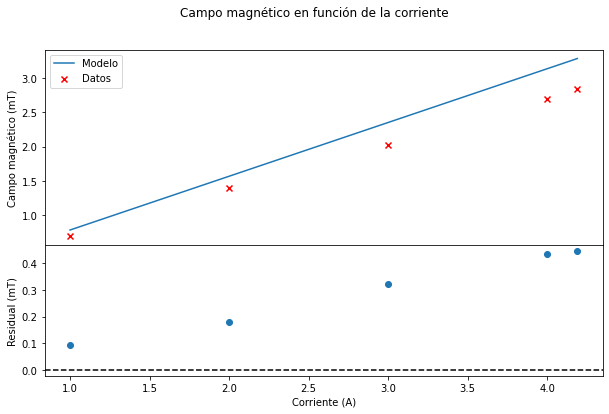

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle('Campo magnético en función de la corriente')

axs[0].set_ylabel('Campo magnético (mT)')
axs[0].scatter(I,B*1000,marker='x',color='r',label='Datos')
#axs[0].scatter(I,B_(I)*1000)
axs[0].plot(I_,B_(I_)*1000,label='Modelo')
axs[0].legend()

axs[1].set_ylabel('Residual (mT)')
axs[1].set_xlabel('Corriente (A)')
axs[1].scatter(I,(B_(I)-B)*1000)
axs[1].axhline(y=0, color='black', linestyle='--')

array([0, 2, 0])